
# Part 1

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#setting up shortcut
path = r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis'

In [3]:
df_customers = pd.read_csv(os.path.join(path,'02 Data','Original Data','customers.csv'))

In [4]:
df_starplat = pd.read_pickle(os.path.join(path,'02 Data','Preped Data','orders_products_starplatinum.pkl'))

In [5]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [6]:
df_starplat.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spent,spender_level,median_usage,customer_frequency
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,both,mid-range product,Regular Busy,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,mid-range product,Second Slowest Day,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,mid-range product,Second Slowest Day,Most orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,mid-range product,Slowest Day,Average Orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,mid-range product,Slowest Day,Most orders,10,New Customer,6.367797,High Spender,20.0,Regular Customer


### Exploration time

In [7]:
df_customers.shape

(206209, 10)

In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [9]:
#looks like we have some nulls in first name. That's ok though I dont think I really need the names here.
#looked into part 2 to see what I'll need. Looks like the main things called out are Age, Family Status, Income, dependants, and I'll need userID as a key
df_customers.drop(columns=['First Name','Surnam', 'Gender', 'STATE', 'date_joined'])

,user_id,Age,n_dependants,fam_status,income
0,26711,48,3,married,165665
1,33890,36,0,single,59285
2,65803,35,2,married,99568
3,125935,40,0,single,42049
4,130797,26,1,married,40374
...,...,...,...,...,...
206204,168073,44,1,married,148828
206205,49635,62,3,married,168639
206206,135902,66,2,married,53374
206207,81095,27,1,married,99799


In [10]:
#looks good
df_customers=df_customers.drop(columns=['First Name','Surnam', 'Gender', 'STATE', 'date_joined'])

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   Age           206209 non-null  int64 
 2   n_dependants  206209 non-null  int64 
 3   fam_status    206209 non-null  object
 4   income        206209 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ MB


In [19]:
#looks like we're good as far as nulls go. Time for data types
for col in df_customers.columns.tolist():
    weird = (df_customers[[col]].applymap(type)!=df_customers[[col]].loc[0].apply(type)).any(axis=1)
    if len(df_customers[weird])>0:
        print(col)


In [20]:
#ok so nothing mixed that's nice but we need to adjust the type of user ID
df_customers['user_id']=df_customers['user_id'].astype('str')

In [21]:
df_customers.dtypes

user_id         object
Age              int64
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [22]:
df_customers.describe()

,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


In [29]:
#man, talk about a wide base. ages 18-81, 0-3 dependants, and 26k to almost 600k annualpay

<AxesSubplot:>

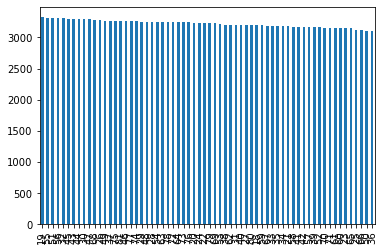

In [28]:
df_customers['Age'].value_counts().plot.bar()

In [30]:
df_customers['fam_status'].value_counts()

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

In [31]:
df_customers['Age'].value_counts()

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: Age, Length: 64, dtype: int64

In [32]:
#I want to keep playing but that'll come up in the next one

In [33]:
#checking for duplicates by setting them into thier own df
customer_dups=df_customers[df_customers.duplicated()]

In [34]:
customer_dups

,user_id,Age,n_dependants,fam_status,income


In [35]:
#cool beans.
#time to tidy up those column names
df_customers.rename(columns={'Age':'user_age','n_dependants':'user_dependants','fam_status':'user_family_status','income':'user_income'},inplace=True)

In [36]:
df_customers.head()

,user_id,user_age,user_dependants,user_family_status,user_income
0,26711,48,3,married,165665
1,33890,36,0,single,59285
2,65803,35,2,married,99568
3,125935,40,0,single,42049
4,130797,26,1,married,40374


In [37]:
#that should do th trick, time to export
df_customers.to_pickle(os.path.join(path,'02 Data','Preped Data','customers_clean.pkl'))

In [38]:
#I need to filter down the current version of the merged one too. I think it has more columns than I'll need
df_starplat.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_spent',
       'spender_level', 'median_usage', 'customer_frequency'],
      dtype='object')

In [39]:
#for what part two is asking for, I can get rid of a few of these... just to make life easier
#Then I'll export it as a new one, so I still have all of that if I want it.
df_starplat.drop(columns=['add_to_cart_order', 'reordered','aisle_id','_merge','days_since_prior_order','price_range', 'busiest_days','mean_spent',
       'spender_level', 'median_usage', 'customer_frequency','mean_spent','max_order','product_name'])

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,product_id,department_id,prices,busiest_period_of_day,loyalty_flag
0,2539329,1,1,2,8,196,7,9.0,Average Orders,New Customer
1,2398795,1,2,3,7,196,7,9.0,Average Orders,New Customer
2,473747,1,3,3,12,196,7,9.0,Most orders,New Customer
3,2254736,1,4,4,7,196,7,9.0,Average Orders,New Customer
4,431534,1,5,4,15,196,7,9.0,Most orders,New Customer
...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,43553,7,3.7,Most orders,Regular Customer
32404855,31526,202557,18,5,11,43553,7,3.7,Most orders,Regular Customer
32404856,758936,203436,1,2,7,42338,19,6.9,Average Orders,New Customer
32404857,2745165,203436,2,3,5,42338,19,6.9,Fewest Orders,New Customer


In [40]:
df_starplat=df_starplat.drop(columns=['add_to_cart_order', 'reordered','aisle_id','_merge','days_since_prior_order','price_range', 'busiest_days','mean_spent',
       'spender_level', 'median_usage', 'customer_frequency','mean_spent','max_order','product_name'])

In [43]:
df_starplat['user_id']=df_starplat['user_id'].astype('str')

In [47]:
df_starplat['prices'].max()

99999.0

In [48]:
df_starplat.loc[df_starplat['prices']>100,'prices']=np.nan

In [50]:
df_starplat['prices'].max()

25.0

In [52]:
df_fusion=df_starplat.join(df_customers.set_index('user_id'),on = 'user_id')

In [53]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                object 
 2   order_number           int64  
 3   order_day_of_week      int64  
 4   order_hour_of_day      int64  
 5   product_id             int64  
 6   department_id          int64  
 7   prices                 float64
 8   busiest_period_of_day  object 
 9   loyalty_flag           object 
 10  user_age               int64  
 11  user_dependants        int64  
 12  user_family_status     object 
 13  user_income            int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 3.6+ GB


In [58]:
#making sure there are no gaps
df_fusion[['user_id','prices','user_age', 'user_dependants']].isnull().sum()

user_id               0
prices             5127
user_age              0
user_dependants       0
dtype: int64

In [62]:
#I'm gonna get rid of those. it's only5k rows which is a statistically insignifigant amount of rows.
df_fusion.dropna(inplace=True)

In [63]:
#making sure it's gone
df_fusion[['user_id','prices','user_age', 'user_dependants']].isnull().sum()

user_id            0
prices             0
user_age           0
user_dependants    0
dtype: int64

In [64]:
#get a quick stats look into it all
df_fusion.describe()

,order_id,order_number,order_day_of_week,order_hour_of_day,product_id,department_id,prices,user_age,user_dependants,user_income
count,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07
mean,1.710746e+06,1.714260e+01,2.738865e+00,1.342514e+01,2.559904e+04,9.918830e+00,7.790994e+00,4.946528e+01,1.501891e+00,9.941685e+04
std,9.872994e+05,1.753544e+01,2.090089e+00,4.246397e+00,1.408498e+04,6.281516e+00,4.241809e+00,1.848558e+01,1.118867e+00,4.300669e+04
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559450e+05,5.000000e+00,1.000000e+00,1.000000e+01,1.354100e+04,4.000000e+00,4.200000e+00,3.300000e+01,1.000000e+00,6.699600e+04
50%,1.711052e+06,1.100000e+01,3.000000e+00,1.300000e+01,2.530500e+04,9.000000e+00,7.400000e+00,4.900000e+01,2.000000e+00,9.660800e+04
75%,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,3.794700e+04,1.600000e+01,1.130000e+01,6.500000e+01,3.000000e+00,1.278840e+05
max,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,4.968800e+04,2.100000e+01,2.500000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [65]:
#ok, looking shiny. Time to export
df_fusion.to_pickle(os.path.join(path,'02 Data','Preped Data','Ords_prods_cust.pkl'))